# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd


student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 6, 6, 7, 8, 9, 10],
                            'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                            'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

In [2]:
# Your code here.

student_data.plot.scatter(x='Age', y='Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 

#The chart shows a linerar negative relations between Age and Tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.

display(student_data[['Age', 'Tardies']].cov())
display(student_data[['Age', 'Tardies']].corr())

#Covariance tells you the direction of the linear relationship, whereas 
#the correlation tells you the direction and the strenght of such relationship.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
from scipy import stats

X = student_data['Age']
y = student_data['Tardies']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

r2_age_tardies = r_value ** 2

print(f'The slope is {slope}')
print(f'intercept is {intercept}')
print(f'Correlation is {r_value}')
print(f'Correlation is {r2_age_tardies}')

#The model predicts with .88 out of 1 of accuracy the frequency of late attendance to class
#of students. I'm using a linear regression

The slope is -0.2428207709159808
intercept is 12.888803363135768
Correlation is -0.9391626886887121
Correlation is 0.8820265558250108


In [15]:
#?stats.linregress

Plot your regression model on your scatter plot.

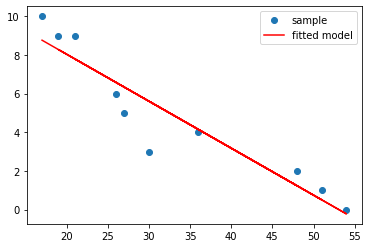

In [14]:
# Your code here.
import matplotlib.pyplot as plt

plt.plot(X, y, 'o', label='sample')
plt.plot(X, intercept + slope*X, 'r', label='fitted model')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

#The model predicts with .88 out of 1 of accuracy the frequency of late attendance to class
#of students. Thus we can infer that the age is a good predictor of tardiness of student

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data

import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [25]:
# Your response here. 

vehicles[['Year','Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year',
          'CO2 Emission Grams/Mile']].corr()['CO2 Emission Grams/Mile']

#Fuel Barrels/Year, Combined MPG and Fuel Cost/Year all have to do with petro consumption
#over time or distance, which makes sense the strong correlations, either negative or positive
#The variable that provides with the least helpful information is 'Year', since is closer to null
#correlation

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [55]:
# Your response here. 

X1 = vehicles[['Year', 'Cylinders']]
X2 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
              'Fuel Cost/Year']]
X3 = vehicles[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model_1 = LinearRegression().fit(X1, y)
model_2 = LinearRegression(normalize=True).fit(X2, y)
model_3 = LinearRegression().fit(X3, y)

print(model_1.score(X1, y))
print(model_2.score(X2, y))
print(model_3.score(X3, y))

0.647502319969115
0.9808734920269122
0.9801993833262163


In [45]:
model_2.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [56]:
model_2.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [30]:
?LinearRegression

Init signature:
LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, optional, default True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``nor

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [57]:
# Your response here. 

    
"""
I have created 3 models to test which group of not extreme correlation variables (model_1)
, all variables asked to consider (model_2) or only extreme correlation variables (model_3)
has the highest R2. Module 2 ranked the highest with 0.9808 R2 value

"""
print(f'Our variables are Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year')
print(f'Their coefficients are {model_2.coef_}')

print(f'The most important variable is Fuel Barrels per Year, since it has the highest normalized coefficient')

Our variables are Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year
Their coefficients are [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
The most important variable is Fuel Barrels per Year, since it has the highest normalized coefficient


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 